<a href="https://colab.research.google.com/github/sakathia/Data110/blob/main/Final_Project_Sandra_Aching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project: Airbnb Data Analysis

## Introduction
Airbnb is an app that acts as an online platform connecting travelers (guests) with property owners (hosts) for brief rentals. The dataset covers information and attributes for 48,895 Airbnb rental listings between the years from 2011 to 2019. I chose this dataset because I wanted to understand the pricing trends and listing availability for rentals in NYC. Also, the dataset was provided by Rachel Saidi.

## EDA Process
Since I wanted to understand more about the dataset provided, I will focus on looking at the attribute data types, and what information I can use for my analysis. Therefore, I will start importing the libraries needed and load the dataset and see the top 5 rows to get an intial understnanding of the data.

In [1]:
!pip install squarify

In [2]:
#Importing the libraries needed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import squarify
import folium
from folium.plugins import HeatMap

In [3]:
# Reading the Airbnb Dataset
airbnb_df = pd.read_csv('https://raw.githubusercontent.com/sakathia/Data110/refs/heads/main/Final%20Project/airbnb_ny19.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
# Reading the top 5 rows to get an understanding of the data provided
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


Then, I wanted to see the shape of the data in terms of columns and rows.

In [5]:
airbnb_df.shape

(48895, 16)

From here we can see that there are 48,895 rows corresponding to the number of Airbnb rental listings and then 16 columns corresponding to the listing attributes. Then, I also wanted to see a summary statistics to understnand how the data is distributed along the attributes.

In [6]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


I also wanted to understand the data types of the variables to get an understanding of which types of graphs would be suitable for my analysis.

In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

I also wanted to check if there were any nulls in the data that would need to be removed so that they would not affect the analysis using `isnull()`. The results show that there are no significant nulls in the dataset that need to be taken care of in terms of analysis.

In [8]:
airbnb_df.isnull().sum() #isnull checks if there are any null values in the data and the sum function sums up the nulls values for each variable

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Furthermore, since I saw that there was a field called `room_type` I wanted to understand if these were unique values that could be analyzed.

In [9]:
unique_values = airbnb_df['room_type'].unique()
print(unique_values)

['Private room' 'Entire home/apt' 'Shared room']


Then, I also saw that there was a field called `neighbourhood_group` and wanted to understand if these were related to the 5 boroughs in NYC that could be used in the analysis.

In [10]:
unique_values = airbnb_df['neighbourhood_group'].unique()
print(unique_values)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Since there was a mix of numerical and string data types, I realized that I would need to do a more categorical/qualitative analysis than purely numerical. Therefore I decided to start with a horiztonal bar chart to get a general sense of how the fields relate in terms of Top 10 Airbnb rental listing prices

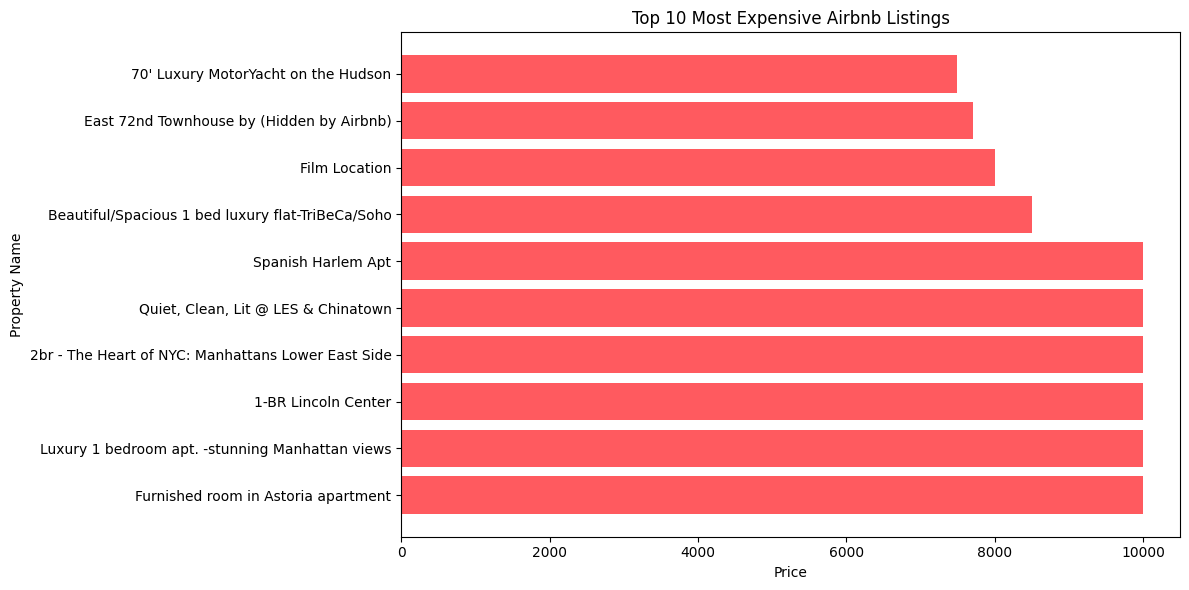

In [11]:
# Sort the DataFrame by 'price' in descending order and grab the top 10 most expensive listings
top_10_expensive_listings = airbnb_df.sort_values(by='price', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_expensive_listings['name'], top_10_expensive_listings['price'], color ="#FF5A5F" )
plt.xlabel('Price')
plt.ylabel('Property Name')
plt.title('Top 10 Most Expensive Airbnb Listings')
plt.tight_layout()
plt.savefig('finalplot-1.png', bbox_inches='tight')
plt.show()


From this bar plot for the top 10 expensive Airbnb listings, I can see that the price range falls between 8,000 USD and 10,000 USD. Further insights shown is that the property listing name for some of them has an indication of the location like for example having Manhattan in the name lets me know that the listing is located in Manhattan. However, this is not the case for all of the listings and from the prices range, it would be important to analyze the prices along all of New York City. The reason I chose to start in this way was to show the areas that need further analysis.

Therefore, I chose to analyze the Airbnb price distributions in NYC using a density plot.

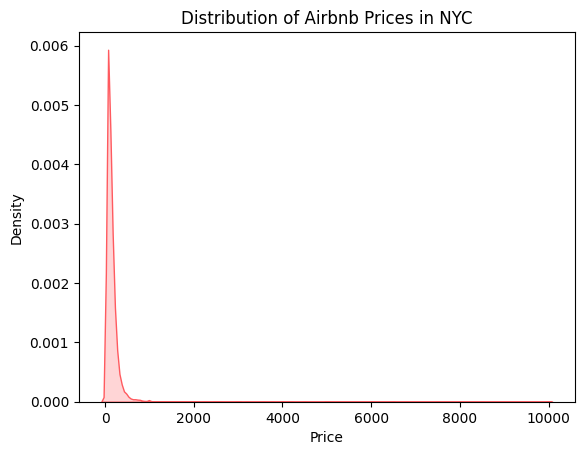

In [12]:
# Create the density plot
sns.kdeplot(data=airbnb_df, x='price', fill= True, color="#FF5A5F")

plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Density')
plt.savefig('finalplot2.png')
plt.show()

In this density plot we can gain an understanding of the price distribtuions in NYC in Airbnb. The reason I chose to visualize using a density plot was because it is a numerical data type and also wanted to see where most of the range of prices fell between so a density plot wouod be the best choice for this analysis.

However, since the density plot is right skewed attributed to outliers in the data, I decided to filter to help visualize more efficiently gain insight into where most of the density of prices fell between. I have conducted the filtering below:

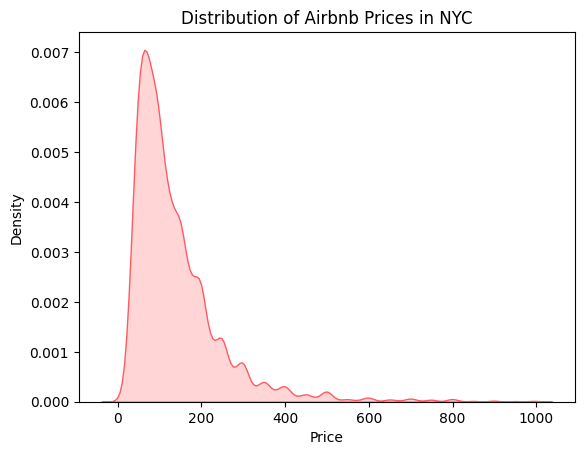

In [13]:
# Create the density plot
airbnb_no_extreme_prices= airbnb_df[airbnb_df['price'] < 1000]
sns.kdeplot(data=airbnb_no_extreme_prices, x='price', fill= True, color="#FF5A5F")

plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Density')
plt.savefig('finalplot3.png')
plt.show()

I conducted a filter in this second density plot for prices under 1,000 USD as the other datapoints did not seem to cover any significant amount of data that could compromise my analysis. Therefore, I can now see in this density plot for the price distribution of Airbnbs in NYC that the price range falls between 75 USD and 200 USD. From the previous graph, I was able to get a general sense of how the listing and price work together and now using a density plot I was able to understand more about how prices are distribution in NYC for Airbnb listings.

Then, I chose to visualize the distribtuion of Airbnb prices by Borough in NYC using a Violin plot.

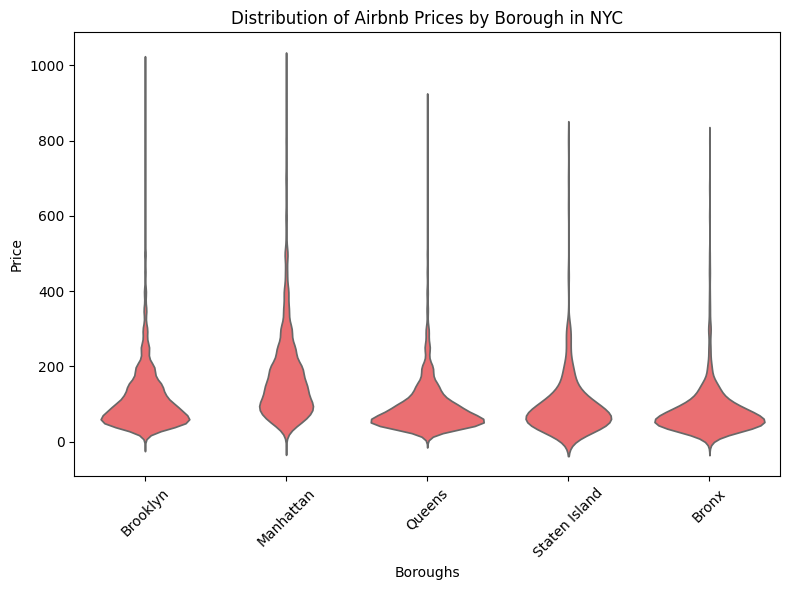

In [14]:
# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=airbnb_no_extreme_prices, inner=None, color="#FF5A5F")

# Customizing the plot
plt.title('Distribution of Airbnb Prices by Borough in NYC')
plt.xlabel('Boroughs')
plt.ylabel('Price')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('finalplot-4.png', bbox_inches='tight')
plt.show()

While I now had a better understanding of the Airbnb price distribution in NYC, I still wanted to have another layer of analysis to pinpoint if there was a difference in prices by location. Since we were not able to see that in the first visualization, I chose to visualize the distribution of prices by borough as it was revealed in the initial EDA exploration. I was able to see that NYC has 5 boroughs: Brooklyn, Manhattan, Queens, Staten Island, and the Bronx. At the same time I was able to see that the density of prices is concentrated closely between 75 USD and 200 USD for most of the 5 boroughs with some slight variations. Also, I was able to see that the most variable density is the Manhattan Borough.

Then, I chose to visualize the average price to rent an Airbnb in NYC depending on the borough location area.

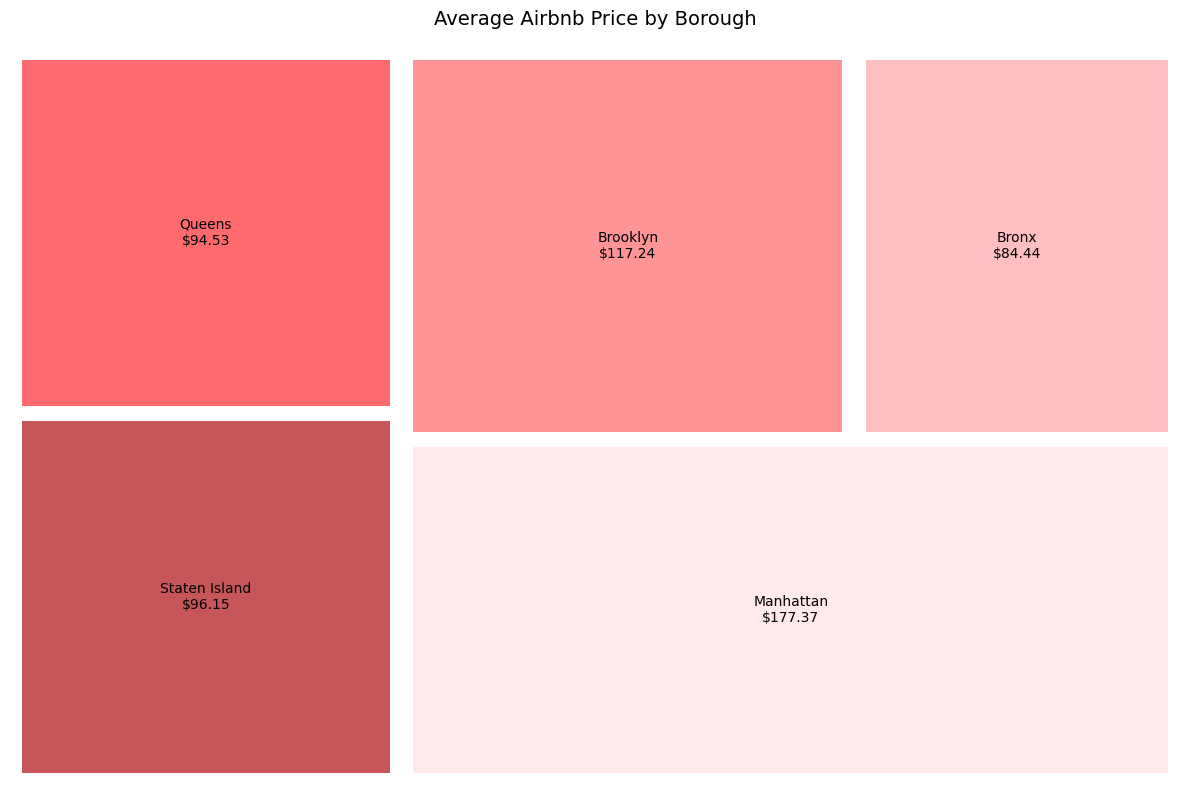

In [15]:
# Prepare data
airbnb_by_borough = airbnb_no_extreme_prices.groupby('neighbourhood_group')['price'].mean().reset_index()
airbnb_by_borough2 = airbnb_by_borough.sort_values(by='neighbourhood_group', ascending=False)  # Sort by price in descending order

# Colors
colors = ["#C14448","#FF5A5F", "#FFE7E8","#FF898C","#FFB8BA"]
# Create the plot
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=airbnb_by_borough2['price'],  # Use the average price
    label=[f"{borough}\n${price:.2f}" for borough, price in
           zip(airbnb_by_borough2['neighbourhood_group'], airbnb_by_borough2['price'])],  # Add borough and price
    color= colors,
    alpha=0.9,
    pad=True  # Add some space between rectangles
)

plt.title('Average Airbnb Price by Borough', fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('finalplot5.png')
plt.show()

In the previous visualizations, we were able to get an understanding of the price distribtion with an added layer of boroughs areas in NYC and now we got even more of an in depth insight as to how much it would cost on average to rent an Airbnb in each of the 5 boroughs of NYC. The highest average price was found to be the Manhattan. Then, the lowest average price was found to be the Bronx.

Then, I chose to visualize and look at the listing availability by Room type using a Vertical Bar plot.

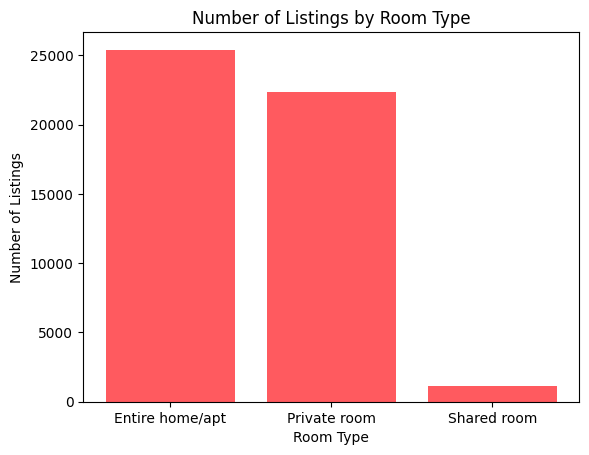

In [16]:
# Bar Plot

plt.bar(airbnb_df['room_type'].value_counts().sort_index().index, # This accesses the room_type
        airbnb_df['room_type'].value_counts().sort_index().values, color="#FF5A5F") # This access the number of listings by the room type

plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Room Type')
plt.savefig('finalplot6.png')
plt.show()

In this layer of analysis I am now shifting the focus to look at the listings available by room type as identifed in the initial exploration analysis of the data. I was able to see that the highest number of listings offered was for an Entire home/apt. Private room type also fell closely behind Entire home/apt room type as we can generally tell that property owners want to offer more private spaces for their clients for brief/short-term vacation rentals. What surprised me was the low count for the number of shared room listings available as I believed the general trend would be the same but in comparison, the count was pretty low. However, it is important to note that while property owners in general included more private spaces to rent, there are still shared spaces included that contributes to the diversity of the listing offerings that can cater to different customer preferences and socio-economic factors.

Finally, I wanted to visualize the concentration and distribution of listings by room type using a heat map to add on another layer of analysis.

In [17]:
#Filtering the data for Room Type to create the layers for the combined heat map
rmtyp_private_nyc = airbnb_df[airbnb_df['room_type'] == 'Private room']
rmtyp_entire_nyc = airbnb_df[airbnb_df['room_type'] == 'Entire home/apt']
rmtyp_shared_nyc = airbnb_df[airbnb_df['room_type'] == 'Shared room']

In [18]:
# Create a base map centered around NYC, NY
map_center = [40.730610, -73.935242]  # Center of NYC
combined_map = folium.Map(location=map_center, zoom_start=11)

In [19]:
#Prepairing the Coordinates for the layers
rmtyp_private_nyc_data = rmtyp_private_nyc[['latitude', 'longitude']].values
rmtyp_entire_nyc_data = rmtyp_entire_nyc[['latitude', 'longitude']].values
rmtyp_shared_nyc_data = rmtyp_shared_nyc[['latitude', 'longitude']].values

In [20]:
#Creating the Layers and feature groups for each heatmap layer
rmtyp_private_nyc_layer = folium.FeatureGroup(name="Private Room Type Heatmap")
rmtyp_entire_nyc_data_layer = folium.FeatureGroup(name="Entire Home/Apt Heatmap")
rmtyp_shared_nyc_layer = folium.FeatureGroup(name="Shared Room Heatmap")

In [21]:
# Adding the heatmap layers to each feature group
HeatMap(rmtyp_private_nyc_data).add_to(rmtyp_private_nyc_layer)
HeatMap(rmtyp_entire_nyc_data).add_to(rmtyp_entire_nyc_data_layer)
HeatMap(rmtyp_shared_nyc_data).add_to(rmtyp_shared_nyc_layer)

In [22]:
# Adding the feature groups to the combined map
rmtyp_private_nyc_layer.add_to(combined_map)
rmtyp_entire_nyc_data_layer.add_to(combined_map)
rmtyp_shared_nyc_layer.add_to(combined_map)

In [23]:
# Adding the layer control to toggle the layers on and off
folium.LayerControl().add_to(combined_map)

# Saving the combined map to an HTML file for viewing
combined_map_path = "NYC_combined_map_layers1.html"
combined_map.save(combined_map_path)

# Displaying path for downloading
combined_map_path

'NYC_combined_map_layers1.html'

The Heat map of Airbnb listings by Room type gives insight into where we can see the most concentration in terms of location and geographic area in contrast to looking at the count number in the previous graph. In the heat map we were able to confirm that the concentration for Entire home/apt and Private Room is very high along NYC and all of the 5 boroughs. We were also able to confirm in the heat map that the concentration for Shared room type listings is low in comparison to the other two room types. However, what we were able to see is that the concentration of shared room listing is spread out among all 5 boroughs in NYC which is adding on to another layer of analysis that we previously did not have with just the listing counts by room type.

## Summary of Findings
Average Prices for renting an Airbnb in NYC falls between 75 USD to 200 USD despite some price outliers. Then, the most expensive area in NYC to rent an Airbnb is in the Manhattan Borough most likely due to it having the most tourist attractions centeralized there driving up the average price in comparison to the other boroughs. Finally, listing availability concerntation is highest for non-shared room types for short-term Airbnb rental.

## Recommendations and Future Considerations
I believe collecting more recent data could help provide additional insights into Airbnb listings. Then, finding Airbnb Listings data for other cities may enhance the analysis of listing availabilities for rentals and price trends and could serve as a comparison to see how Airbnb listing perform across all popular U.S. cities like Miami, or Washington DC. Also, ​looking into metrics like occupation rates and cancellation rates can provide insight into how a listing performs. Finally, finding demographic data can provide another layer of analysis into the target audience and customer preferences for listings
